<a href="https://colab.research.google.com/github/ferrry-ghsb/bigdata_6team/blob/main/yongjin's-RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
from tensorflow import keras
import pandas as pd

In [16]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [17]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)

In [18]:
series.shape

(10000, 51, 1)

In [19]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]

In [20]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

In [21]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[50, 1])
])

In [22]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam())

In [23]:
model.fit(X_train, y_train)

219/219 [==============================] - 12s 53ms/step - loss: 0.1929


# Practice

In [14]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv', usecols=['date','sales'], index_col='date')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
train

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


In [26]:
sales_data = []
for day in sorted(list(set(train.index))):
    sales_data += [train.loc[day].values.squeeze().tolist()]

In [27]:
sales_data = np.array(sales_data)

In [28]:
sales_data.shape

(1684, 1782)

In [29]:
train = sales_data[:1600]

In [30]:
valid = sales_data[1600:]

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(train)
valid = scaler.transform(valid)

In [32]:
time_steps = 7
ts_train_len = 1600
ts_valid_len = len(valid)
for_periods = 7

In [33]:
len(valid)

84

In [34]:
X_train = []
y_train = []
for i in range(time_steps, ts_train_len-1):
    X_train.append(train[i-time_steps:i])
    y_train.append(train[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [35]:
X_valid = []
y_valid = []
for i in range(time_steps, ts_valid_len-1):
    X_valid.append(valid[i-time_steps:i])
    y_valid.append(valid[i])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [36]:
X_train.shape

(1592, 7, 1782)

In [37]:
y_train.shape

(1592, 1782)

In [38]:
X_valid.shape

(76, 7, 1782)

In [39]:
y_valid.shape

(76, 1782)

In [40]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(100, input_shape=[None, 1782], return_sequences=True),
    keras.layers.SimpleRNN(100, return_sequences=True),
    keras.layers.SimpleRNN(100),
    keras.layers.Dense(1782)
])

In [41]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam())

In [42]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
50/50 [==============================] - 4s 42ms/step - loss: 0.7563 - val_loss: 1.9231
Epoch 2/100
50/50 [==============================] - 2s 33ms/step - loss: 0.6284 - val_loss: 1.8444
Epoch 3/100
50/50 [==============================] - 2s 31ms/step - loss: 0.5825 - val_loss: 1.7253
Epoch 4/100
50/50 [==============================] - 2s 32ms/step - loss: 0.5474 - val_loss: 1.6291
Epoch 5/100
50/50 [==============================] - 2s 33ms/step - loss: 0.5247 - val_loss: 1.5401
Epoch 6/100
50/50 [==============================] - 2s 32ms/step - loss: 0.5063 - val_loss: 1.4766
Epoch 7/100
50/50 [==============================] - 2s 32ms/step - loss: 0.4902 - val_loss: 1.4280
Epoch 8/100
50/50 [==============================] - 2s 31ms/step - loss: 0.4788 - val_loss: 1.4108
Epoch 9/100
50/50 [==============================] - 2s 32ms/step - loss: 0.4686 - val_loss: 1.3906
Epoch 10/100
50/50 [==============================] - 2s 33ms/step - loss: 0.4615 - val_loss: 1.3888

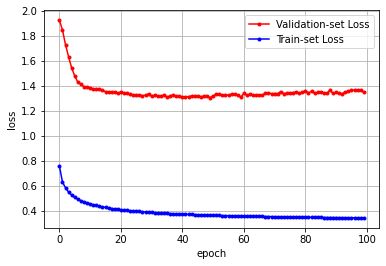

In [43]:
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [44]:
sales_data.shape

(1684, 1782)

In [45]:
len(sales_data[:, 1])

1684

In [46]:
scaler.transform(sales_data)[1620:,3]

array([ 1.41348601,  1.59061534,  0.80183629,  1.34844633,  1.63351385,
       -0.76465123,  1.29447724,  1.96424752,  1.4190213 ,  0.36869972,
        1.15747877,  1.54494918, -0.67470275,  0.94713769,  0.75201866,
        0.8931686 ,  0.78938188,  1.29862871,  1.437011  , -0.58475426,
        1.34014339,  1.00525825,  1.56847417,  1.00525825,  1.40656689,
        1.09797439, -0.5210984 ,  1.07998469,  1.12703467,  1.24881108,
        0.77139218,  1.34429486,  0.86549214, -0.66224834,  1.13948907,
        1.42732423,  1.1228832 ,  0.62055549,  1.80095642,  0.96927886,
       -0.7383586 ,  0.83089657,  1.21836698,  0.94713769,  0.61502019,
        1.10766115,  0.83504803, -0.47819989,  1.18515523,  1.4799095 ,
        1.50481832,  0.663454  ,  1.27510372,  0.74094808, -0.81585268,
        0.73126132,  1.19069052,  1.04262147,  1.13395378, -0.76326741,
        0.14036894, -1.04418346,  0.89040095,  0.53199082])

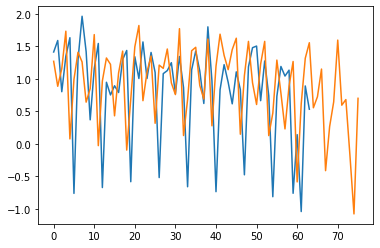

In [47]:
plt.plot(scaler.transform(sales_data)[1620:,3])
plt.plot(model.predict(X_valid)[:, 3])

In [48]:
sales_data[:, 3]

array([   0., 1091.,  919., ...,  803., 2201., 1942.])

In [49]:
model.predict(X_valid[:3])

array([[ 0.23483475,  0.00861402,  1.0078619 , ...,  0.41974005,
        -0.7613804 ,  0.21582484],
       [-0.05583475,  0.00722157,  0.73263425, ...,  0.41954386,
        -0.78865397,  0.09781794],
       [ 0.5030626 ,  0.0114535 ,  0.82625234, ...,  0.63577896,
        -0.44656694,  0.1792144 ]], dtype=float32)

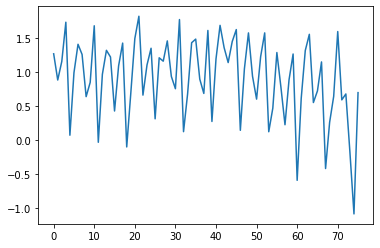

In [50]:
plt.plot(model.predict(X_valid)[:, 3])

In [51]:
def plot_predict(a = 0):
    plt.plot(scaler.transform(sales_data)[-77:,a])
    plt.plot(model.predict(X_valid)[:, a])
    plt.legend(['True', 'Predict'])
    plt.show()